In [41]:
from typing import List

In [26]:
f = open('../stat_files/bp.stat.0.out')
m = open('../stat_files/memory.stat.0.out')

In [27]:
f_lines = f.readlines()
m_lines = m.readlines()

In [15]:
ipc = float(f_lines[4].split()[-1])

In [22]:
bp = float(f_lines[22].split()[2].replace('%', ''))

In [29]:
IPC, BP

(1.96812, 2.426)

In [31]:
icms = float(m_lines[6].split()[2][:-1])

In [37]:
dcms = float(m_lines[31].split()[2][:-1])

1.048

In [43]:
def extract_one_spec(dir_path: str) -> List[float]:
    bp_file = open(F'{dir_path}/bp.stat.0.out')
    mem_file = open(F'{dir_path}/memory.stat.0.out')
    f_lines = bp_file.readlines()
    m_lines = mem_file.readlines()
    ipc = float(f_lines[4].split()[-1])
    bp = float(f_lines[22].split()[2].replace('%', ''))
    icms = float(m_lines[6].split()[2][:-1])
    dcms = float(m_lines[31].split()[2][:-1])
    return [ipc, bp, icms, dcms]

In [45]:
IPC = []
BP_MISPRED = []
ICACHE_MISS = []
DCACHE_MISS = []

In [46]:
for i in range(0, 20):
    ipc, bpm, ims, dms = extract_one_spec('../stat_files')
    IPC.append(ipc)
    BP_MISPRED.append(bpm)
    ICACHE_MISS.append(ims)
    DCACHE_MISS.append(dms)

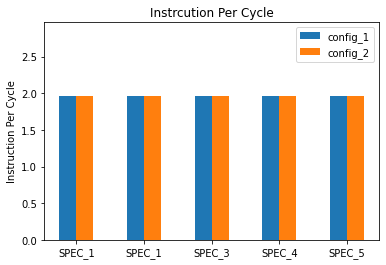

In [108]:
import matplotlib.pyplot as plt
import numpy as np


specs = ['SPEC_1', 'SPEC_1', 'SPEC_3', 'SPEC_4', 'SPEC_5'] # name of every spec
IPC_config_1 = IPC[0:5]
IPC_config_2 = IPC[5:10]

x = np.arange(len(specs))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
plt.ylim((0, max(IPC_config_1) + 1))
rects1 = ax.bar(x - width/2, IPC_config_1, width, label='config_1', in_layout=False)
rects2 = ax.bar(x + width/2, IPC_config_2, width, label='config_2', in_layout=False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Instruction Per Cycle')
ax.set_title('Instrcution Per Cycle')
ax.set_xticks(x, specs)
ax.legend(loc='upper right')

plt.show()

In [93]:
plt.subplots?

SyntaxError: invalid syntax (152260215.py, line 1)